In [ ]:
https://raw.githubusercontent.com/hikmahhh/dataa/main/hikmahh.csv

In [8]:
import pandas as pd
import statsmodels.api as sm

#Uji Autokorelasi
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

#UJI Heteroskedastisitas 
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

#UJI Mulikolonieritas
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Algortima Regresi dengan paket STATMODEL
import pandas as pd
import statsmodels.api as sm



In [4]:
# Tautan ke file CSVv
url = "https://raw.githubusercontent.com/hikmahhh/dataa/main/hikmahh.csv"

# Memuat data dari tautan CSV ke DataFrame
df = pd.read_csv(url)

# Menambahkan kolom konstanta (intercept)
df = sm.add_constant(df)  

# Membentuk model regresi
model = sm.OLS(df['Y'], df[['const', 'X1', 'X2']])

# Melakukan fitting model
results = model.fit()

# Menampilkan summary model regresi
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     26.54
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.72e-05
Time:                        17:27:38   Log-Likelihood:                -52.751
No. Observations:                  17   AIC:                             111.5
Df Residuals:                      14   BIC:                             114.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0024      7.860      4.962      0.0

C:\Users\komputer\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Koefisien X1: 0.42077778469627225
Koefisien X2: 0.12649892989874537
Intercept: 39.00235598993606


C:\Users\komputer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



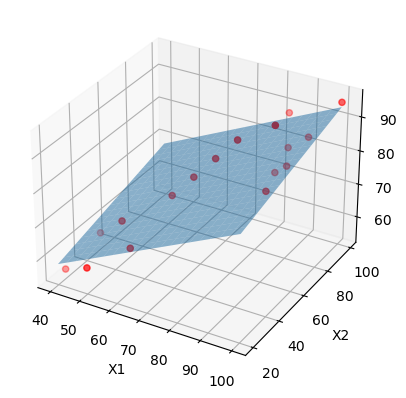

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Memuat data dari tautan CSV
url = "https://raw.githubusercontent.com/hikmahhh/dataa/main/hikmahh.csv"
df = pd.read_csv(url)

X = df[['X1', 'X2']]
y = df['Y']

model = LinearRegression()
model.fit(X, y)

# Koefisien regresi
coef_x1 = model.coef_[0]
coef_x2 = model.coef_[1]
intercept = model.intercept_

print(f'Koefisien X1: {coef_x1}')
print(f'Koefisien X2: {coef_x2}')
print(f'Intercept: {intercept}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['X1'], df['X2'], df['Y'], c='r', marker='o')

# Prediksi hasil regresi untuk plot permukaan
x1_range = np.linspace(df['X1'].min(), df['X1'].max(), 20)
x2_range = np.linspace(df['X2'].min(), df['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred = model.predict(np.column_stack((x1_mesh.ravel(), x2_mesh.ravel())))
y_pred = y_pred.reshape(x1_mesh.shape)

ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()


C:\Users\komputer\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     26.54
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.72e-05
Time:                        22:00:54   Log-Likelihood:                -52.751
No. Observations:                  17   AIC:                             111.5
Df Residuals:                      14   BIC:                             114.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0024      7.860      4.962      0.0

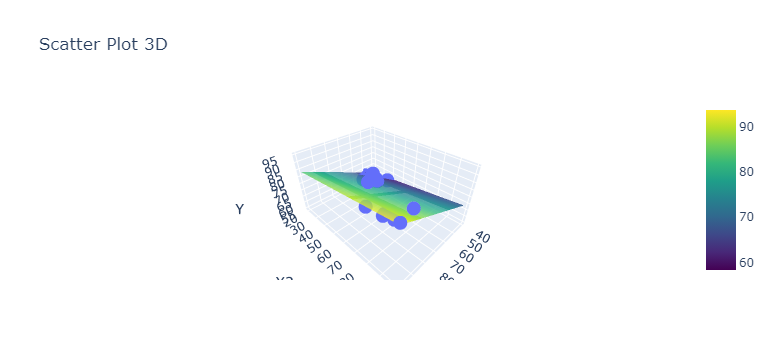

' from statsmodels.stats.diagnostic import het_breuschpagan\n\n_, p_value, _, _ = het_breuschpagan(model.resid, X)\nif p_value < 0.05:\n    print("Terdapat bukti heteroskedastisitas.")\nelse:\n    print("Tidak terdapat bukti heteroskedastisitas.") '

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

# Memuat data dari tautan CSV
url = "https://raw.githubusercontent.com/hikmahhh/dataa/main/hikmahh.csv"
df = pd.read_csv(url)

X = df[['X1', 'X2']]  # Variabel independen
X = sm.add_constant(X)  # Tambahkan konstanta
Y = df['Y']  # Variabel dependen

model = sm.OLS(Y, X).fit()  # Membuat model regresi OLS
summary = model.summary()  # Tampilkan ringkasan model
print(summary)

# Scatter plot untuk melihat hubungan antara X1, X2, dan Y
fig = px.scatter_3d(df, x='X1', y='X2', z='Y', title='Scatter Plot 3D')

# Regresi berganda sebagai bidang
xx, yy = np.meshgrid(df['X1'], df['X2'])
zz = model.params['const'] + model.params['X1'] * xx + model.params['X2'] * yy
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.8, colorscale='Viridis'))

fig.show()

''' from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(model.resid, X)
if p_value < 0.05:
    print("Terdapat bukti heteroskedastisitas.")
else:
    print("Tidak terdapat bukti heteroskedastisitas.") '''


## Uji Autokorelasi

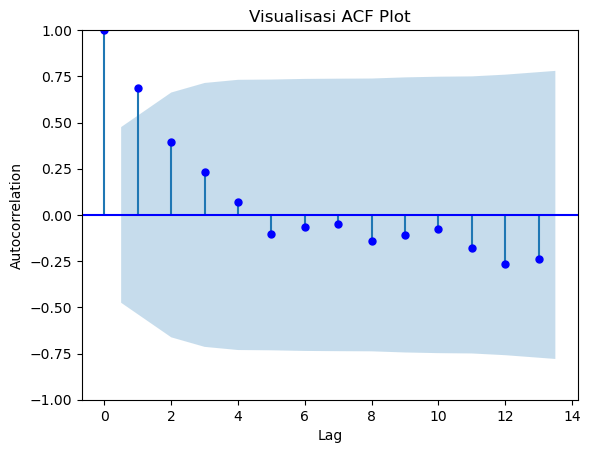

In [27]:
fig, ax = plt.subplots()
plot_acf(df['Y'], ax=ax, color='blue')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.title('Visualisasi ACF Plot')
plt.savefig('Visualisasi ACF Plot')
plt.show()

## Uji Heterokedastisitas

In [15]:
X = df[['X1', 'X2']]
y = df['Y']

X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result_het_white_test = het_white(result.resid, X)
print(result_het_white_test)

(6.660442532007251, 0.2471428434333888, 1.3980403123842544, 0.28409930047024085)


## Uji Multikoloneritas

In [18]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Gantilah "df" dengan DataFrame yang sesuai
df = sm.add_constant(df) 

VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF.index = df.columns
print(VIF)


             VIF
const  15.268980
X1      5.965771
X2      1.193833
Y       5.630925
